<a href="https://colab.research.google.com/github/PedroAABR/superstore-analysis/blob/main/Analise_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
#Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from google.colab import files
uploaded = files.upload()

Saving Superstore.csv to Superstore (3).csv


In [185]:
# Carregar o dataset, modificar codificação
df = pd.read_csv('Superstore.csv',  encoding='latin1')

In [186]:
# Informações gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [187]:
# Verificar valores nulos
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [188]:
# Estatísticas descritivas
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [189]:
# Remover colunas desnecessárias
df.drop(['Country','Postal Code', 'Row ID'], axis=1, inplace=True)

# Verificar e remover duplicatas
df.drop_duplicates(inplace=True)

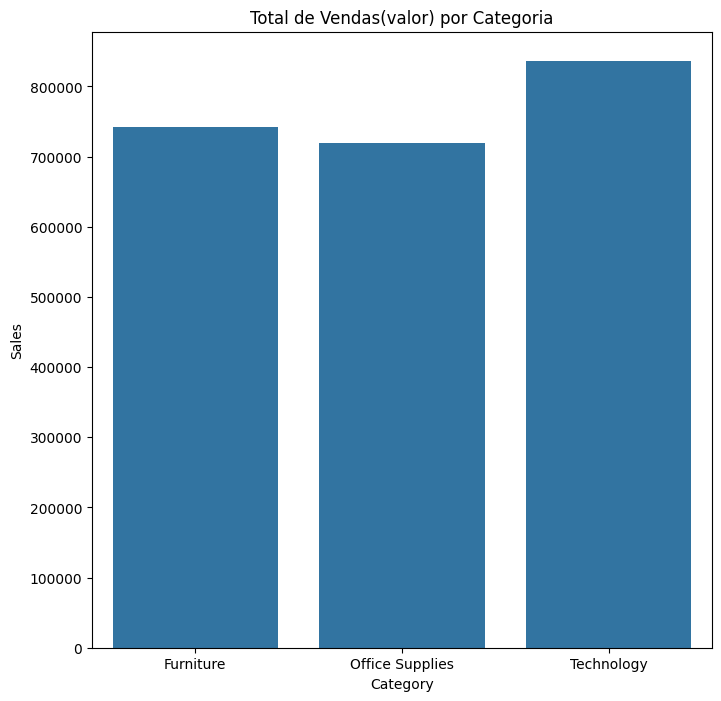

In [190]:
# Total de vendas por categoria
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(8,8))
sns.barplot(x='Category', y='Sales', data=category_sales)
plt.title('Total de Vendas(valor) por Categoria')
plt.savefig('Vendas_categoria.png')
plt.show()

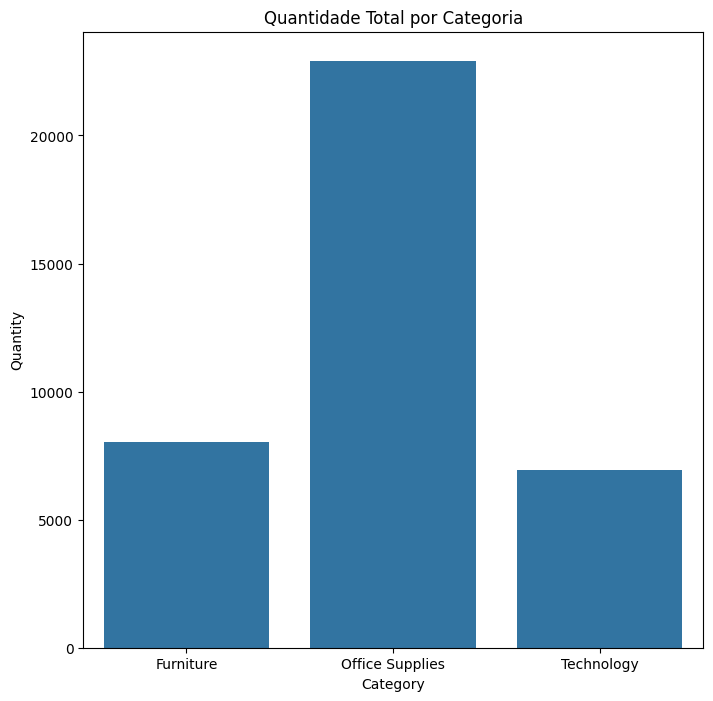

In [191]:
# Quantidade de vendas por categoria
category_quantity = df.groupby('Category')['Quantity'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(8,8))
sns.barplot(x='Category', y='Quantity', data=category_quantity)
plt.title('Quantidade Total por Categoria')
plt.savefig('Quantidade_categoria.png')
plt.show()

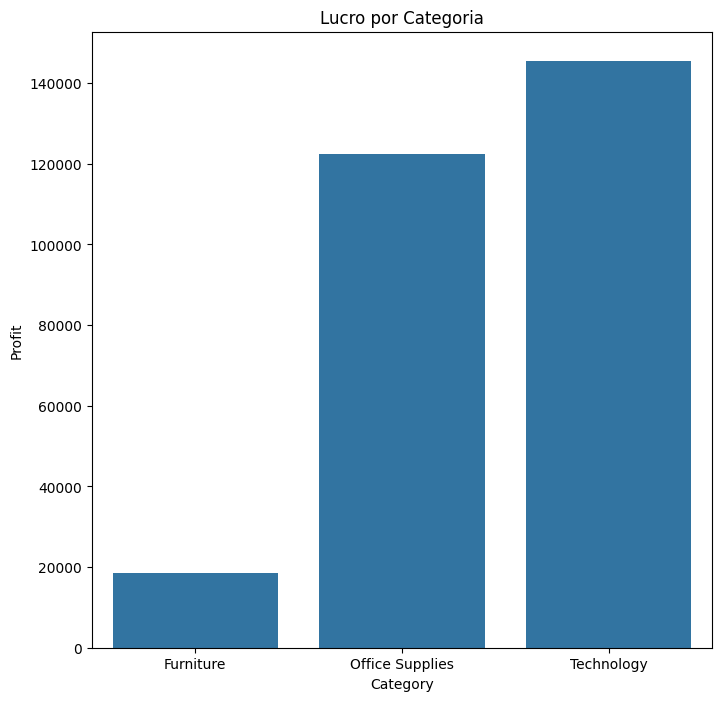

In [192]:
# Lucro por categoria
category_profit = df.groupby('Category')['Profit'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(8,8))
sns.barplot(x='Category', y='Profit', data=category_profit)
plt.title('Lucro por Categoria')
plt.savefig('Lucro_categoria.png')
plt.show()

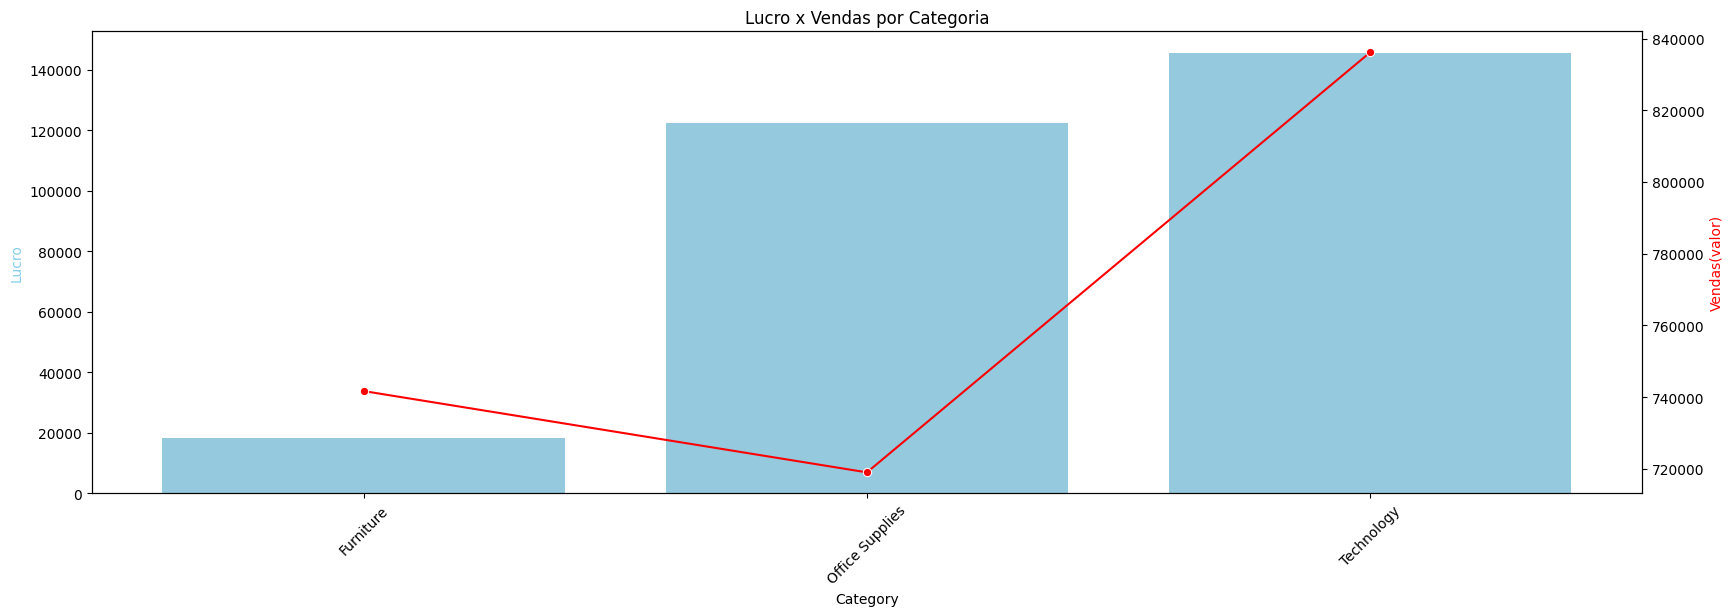

In [193]:
# Gráfico com dois eixos Lucro e Valor de vendas da categoria
fig, ax1 = plt.subplots(figsize=(20,6))

ax2 = ax1.twinx()
sns.barplot(x='Category', y='Profit', data=category_profit, color='skyblue', ax=ax1)
sns.lineplot(x='Category', y='Sales', data=category_sales, color='red', marker='o', ax=ax2)

ax1.set_ylabel('Lucro', color='skyblue')
ax2.set_ylabel('Vendas(valor)', color='red')
plt.title('Lucro x Vendas por Categoria')
ax1.tick_params(axis='x', rotation=45)
plt.savefig('LucroVendas_categoria.png')
plt.show()

<ipython-input-194-1af89fda8ed0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Ticket Médio', data=df_comparativo, palette='coolwarm')


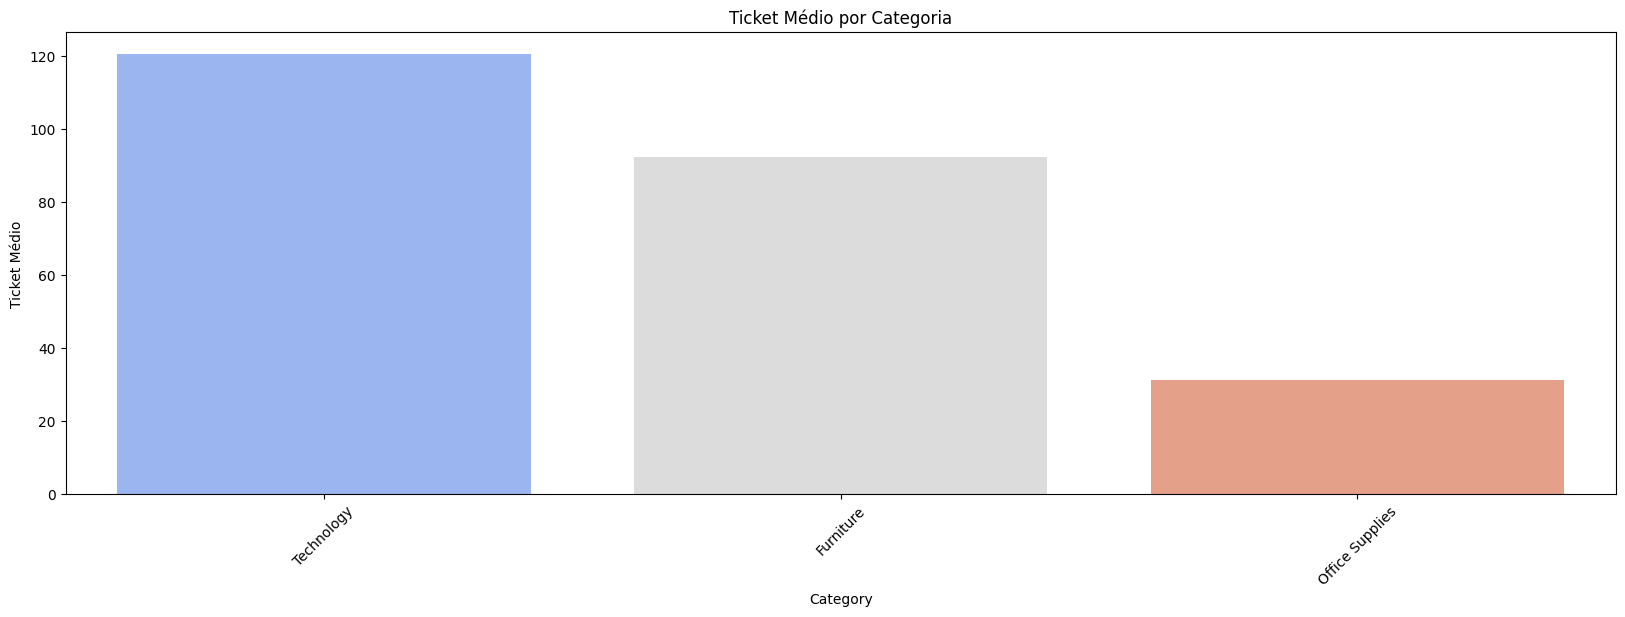

In [194]:
# Junta os dois DataFrames pela Categoria
df_comparativ = pd.merge(category_quantity, category_sales, on='Category')

# Calcula o ticket médio por categoria
df_comparativ['Ticket Médio'] = df_comparativ['Sales'] / df_comparativ['Quantity']

# Ordenar para melhor visualização
df_comparativo = df_comparativ.sort_values(by='Ticket Médio', ascending=False)

# Gráfico
plt.figure(figsize=(20,6))
sns.barplot(x='Category', y='Ticket Médio', data=df_comparativo, palette='coolwarm')
plt.title('Ticket Médio por Categoria')
plt.xticks(rotation=45)
plt.savefig('TicketMedio_categoria.png')
plt.show()

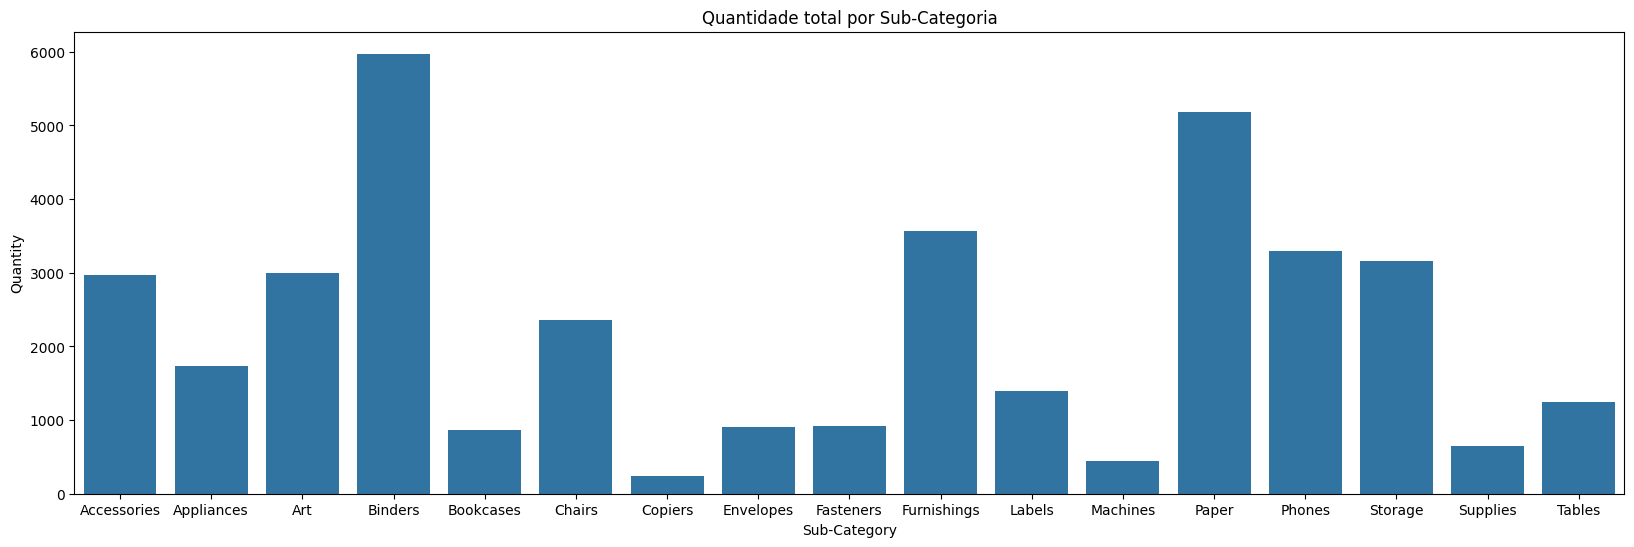

In [195]:
# Quantidade de vendas por sub-categoria
subcategory_quantity = df.groupby('Sub-Category')['Quantity'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(20,6))
sns.barplot(x='Sub-Category', y='Quantity', data=subcategory_quantity)
plt.title('Quantidade total por Sub-Categoria')
plt.savefig('Quantidade_subcategoria.png')
plt.show()

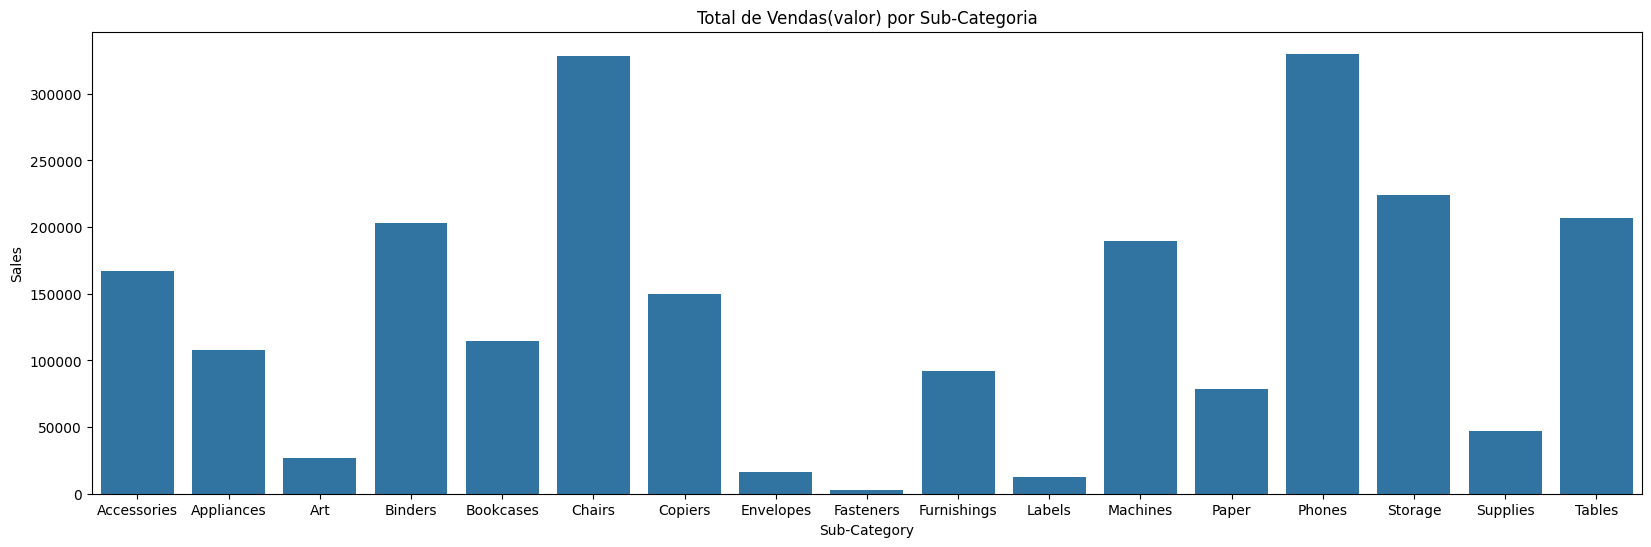

In [196]:
# Total de vendas por sub-categoria
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(20,6))
sns.barplot(x='Sub-Category', y='Sales', data=subcategory_sales)
plt.title('Total de Vendas(valor) por Sub-Categoria')
plt.savefig('Vendas_subcategoria.png')
plt.show()

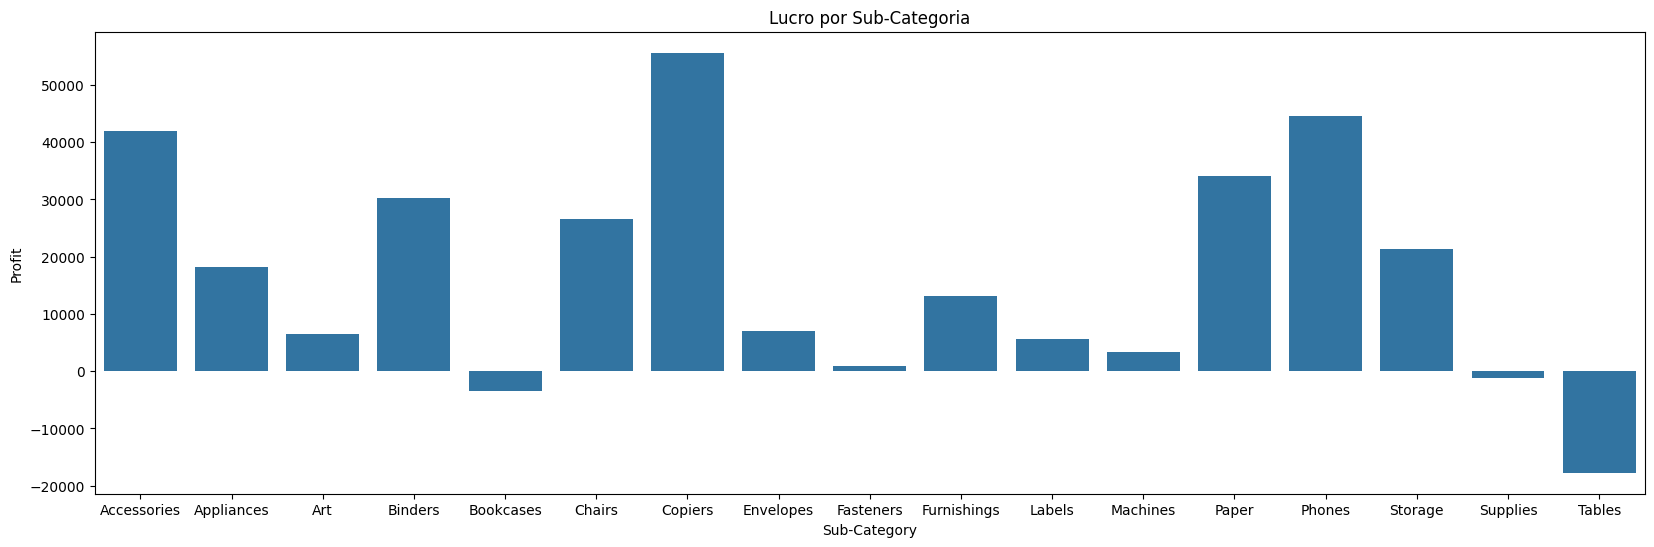

In [197]:
# Lucro por sub-categoria
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(20,6))
sns.barplot(x='Sub-Category', y='Profit', data=subcategory_profit)
plt.title('Lucro por Sub-Categoria')
plt.savefig('Lucro_subcategoria.png')
plt.show()

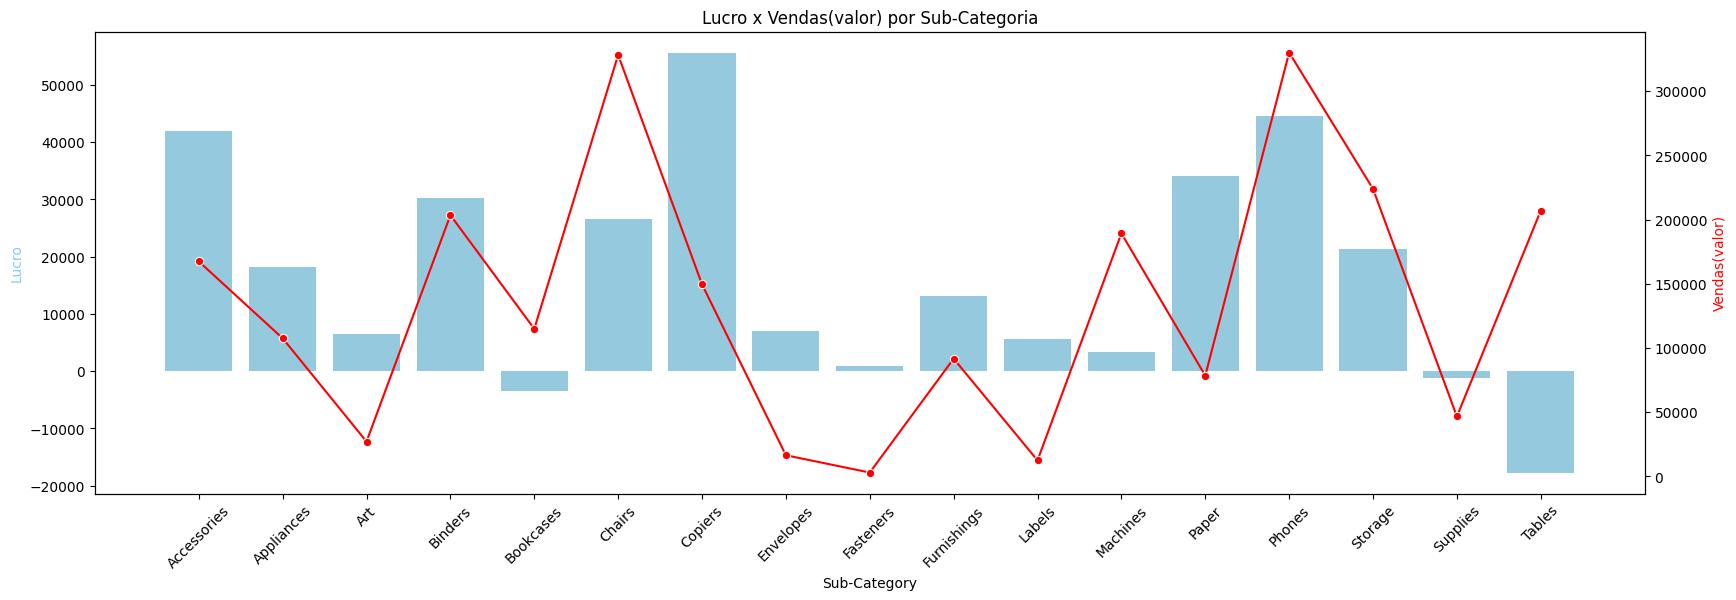

In [198]:
# Gráfico com dois eixos entre Lucro e Valor de vendas da sub-categoria
fig, ax1 = plt.subplots(figsize=(20,6))

ax2 = ax1.twinx()
sns.barplot(x='Sub-Category', y='Profit', data=subcategory_profit, color='skyblue', ax=ax1)
sns.lineplot(x='Sub-Category', y='Sales', data=subcategory_sales, color='red', marker='o', ax=ax2)

ax1.set_ylabel('Lucro', color='skyblue')
ax2.set_ylabel('Vendas(valor)', color='red')
plt.title('Lucro x Vendas(valor) por Sub-Categoria')
ax1.tick_params(axis='x', rotation=45)
plt.savefig('LucroVendas_subcategoria.png')
plt.show()

<ipython-input-199-137d2acb0038>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-Category', y='Ticket Médio', data=df_comparativo, palette='coolwarm')


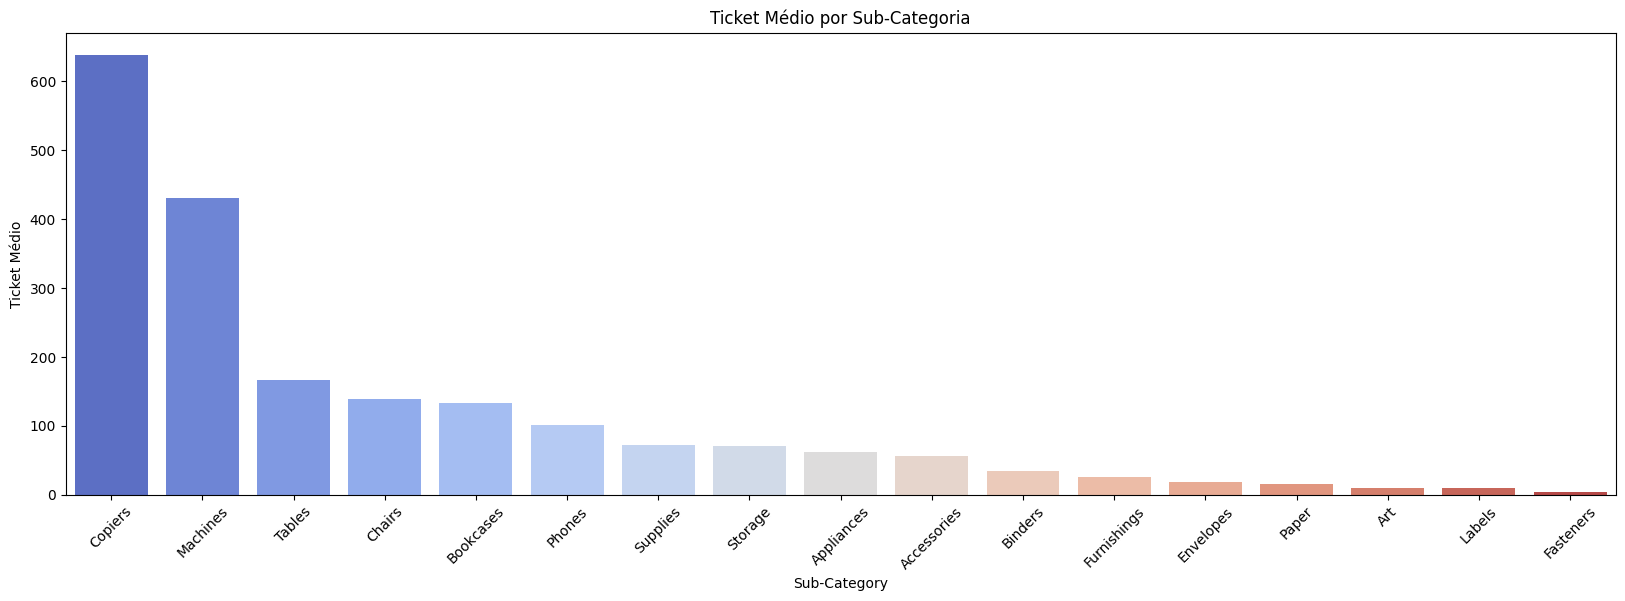

In [199]:
# Junta os dois DataFrames pela Sub-Categoria
df_comparativo = pd.merge(subcategory_quantity, subcategory_sales, on='Sub-Category')

# Calcula o ticket médio por subcategoria
df_comparativo['Ticket Médio'] = df_comparativo['Sales'] / df_comparativo['Quantity']

# Ordenar para melhor visualização
df_comparativo = df_comparativo.sort_values(by='Ticket Médio', ascending=False)

# Gráfico
plt.figure(figsize=(20,6))
sns.barplot(x='Sub-Category', y='Ticket Médio', data=df_comparativo, palette='coolwarm')
plt.title('Ticket Médio por Sub-Categoria')
plt.xticks(rotation=45)
plt.savefig('TicketMedio_subcategoria.png')
plt.show()

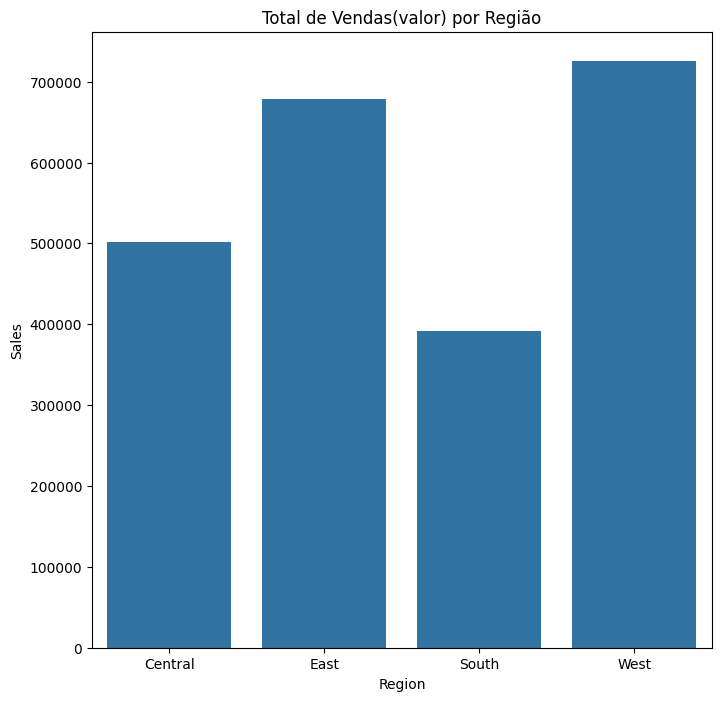

In [200]:
# Total de vendas por região
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(8,8))
sns.barplot(x='Region', y='Sales', data=region_sales)
plt.title('Total de Vendas(valor) por Região')
plt.savefig('Vendas_regiao.png')
plt.show()

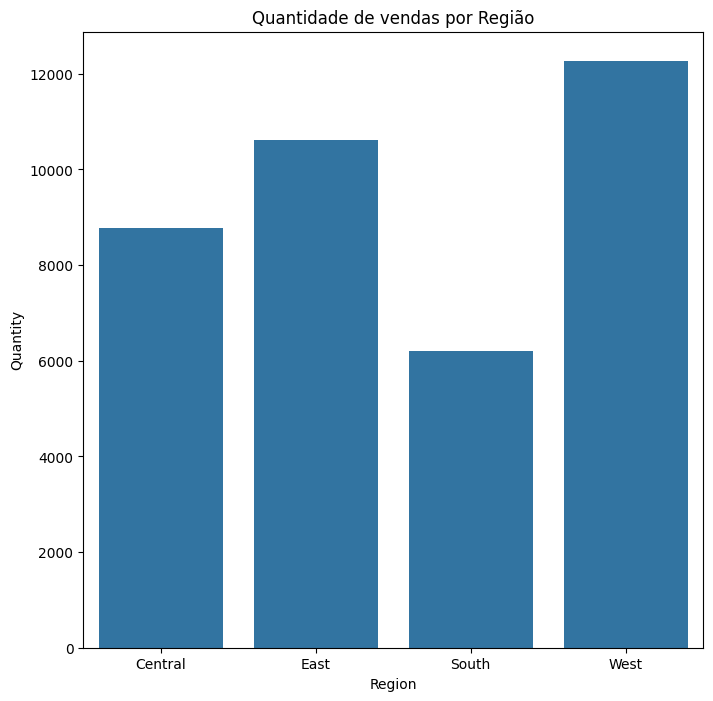

In [201]:
# Quantidade de vendas por região
region_quantity = df.groupby('Region')['Quantity'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(8,8))
sns.barplot(x='Region', y='Quantity', data=region_quantity)
plt.title('Quantidade de vendas por Região')
plt.savefig('Quantidade_regiao.png')
plt.show()

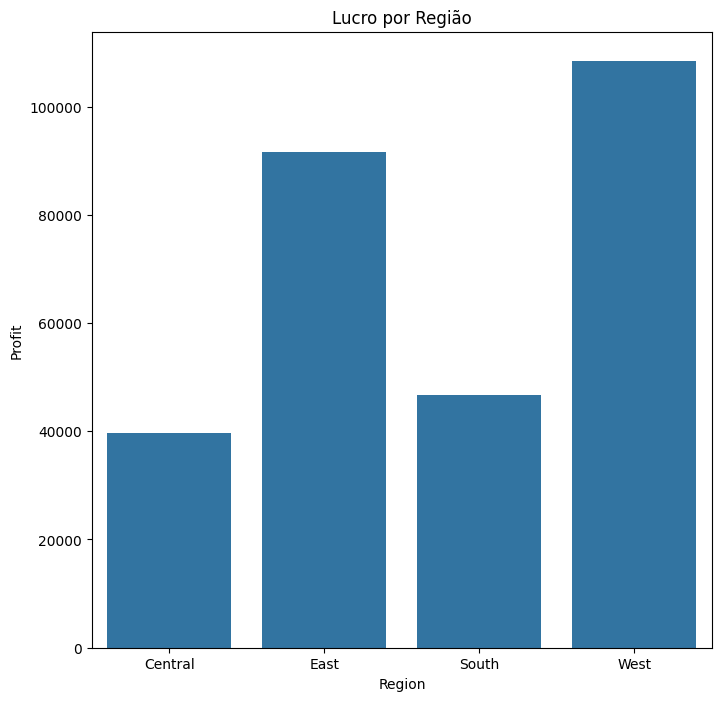

In [202]:
# Lucro por região
region_profit = df.groupby('Region')['Profit'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(8,8))
sns.barplot(x='Region', y='Profit', data=region_profit)
plt.title('Lucro por Região')
plt.savefig('Lucro_regiao.png')
plt.show()

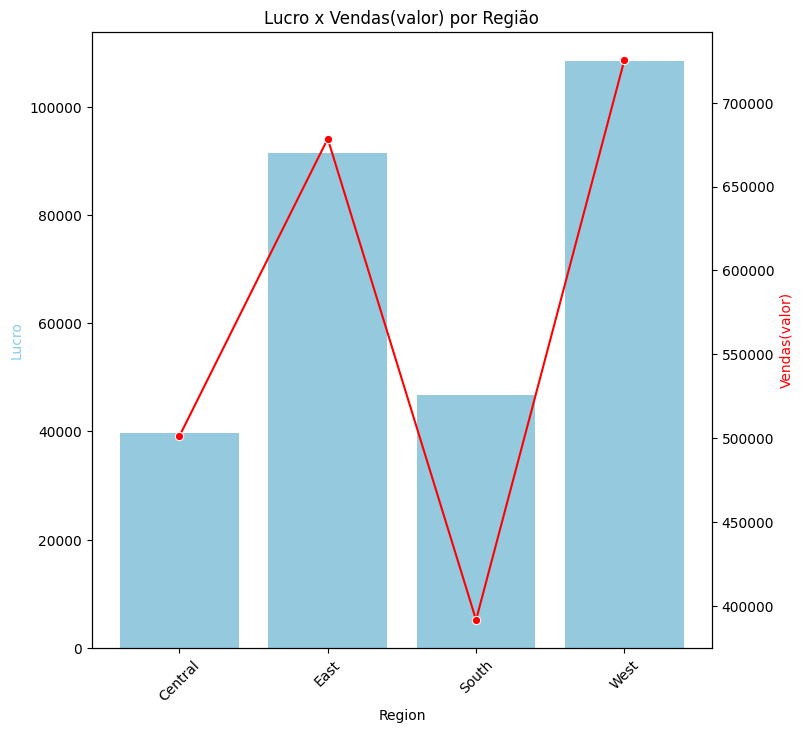

In [203]:
# Gráfico com dois eixos entre Lucro e Valor de vendas da região
fig, ax1 = plt.subplots(figsize=(8,8))

ax2 = ax1.twinx()
sns.barplot(x='Region', y='Profit', data=region_profit, color='skyblue', ax=ax1)
sns.lineplot(x='Region', y='Sales', data=region_sales, color='red', marker='o', ax=ax2)

ax1.set_ylabel('Lucro', color='skyblue')
ax2.set_ylabel('Vendas(valor)', color='red')
plt.title('Lucro x Vendas(valor) por Região')
ax1.tick_params(axis='x', rotation=45)
plt.savefig('LucroVendas_regiao.png')
plt.show()

<ipython-input-204-7db5fe984d5d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Ticket Médio', data=df_comparativo, palette='coolwarm')


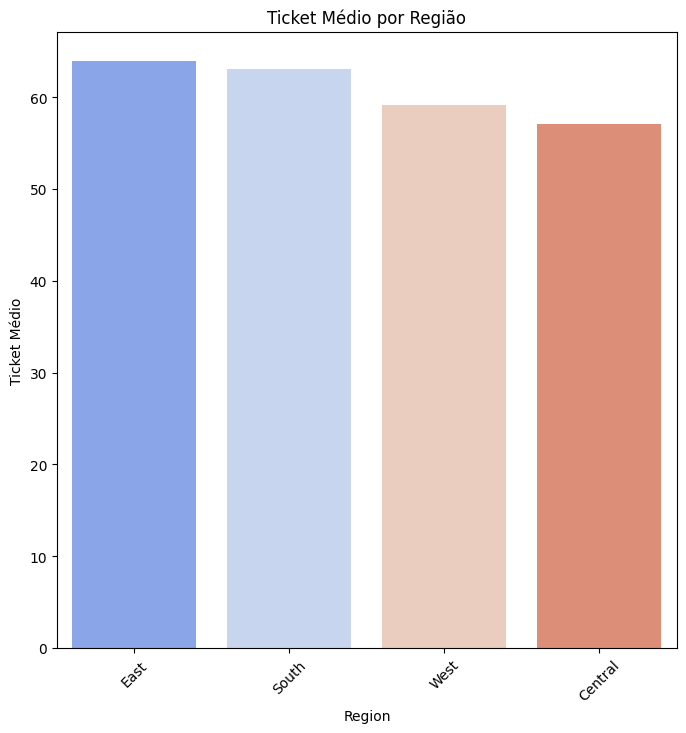

In [204]:
# Junta os dois DataFrames pela Região
df_comparativo = pd.merge(region_quantity, region_sales, on='Region')

# Calcula o ticket médio por região
df_comparativo['Ticket Médio'] = df_comparativo['Sales'] / df_comparativo['Quantity']

# Ordenar para melhor visualização
df_comparativo = df_comparativo.sort_values(by='Ticket Médio', ascending=False)

# Gráfico
plt.figure(figsize=(8,8))
sns.barplot(x='Region', y='Ticket Médio', data=df_comparativo, palette='coolwarm')
plt.title('Ticket Médio por Região')
plt.xticks(rotation=45)
plt.savefig('TicketMedio_regiao.png')
plt.show()

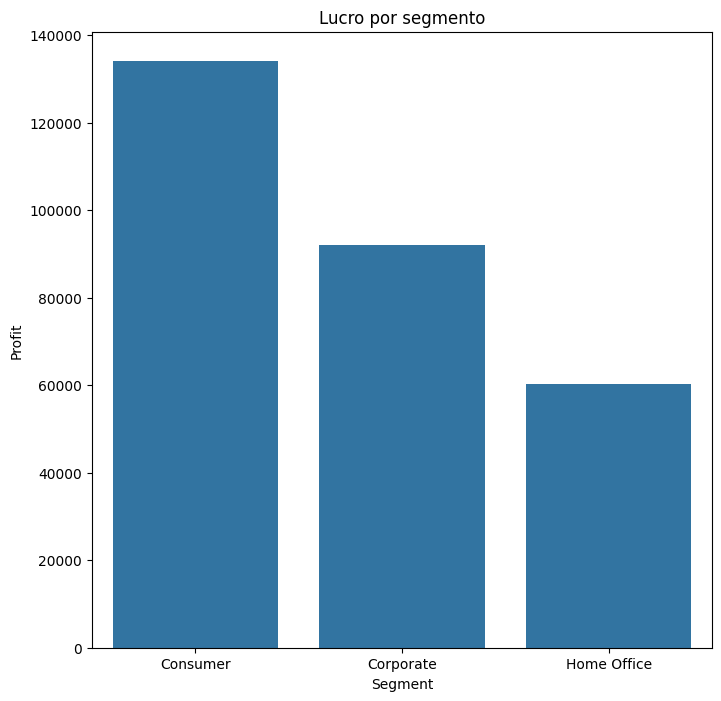

In [205]:
# Lucro por segmento
segment_profit = df.groupby('Segment')['Profit'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(8,8))
sns.barplot(x ='Segment', y = 'Profit', data=segment_profit)
plt.title('Lucro por segmento')
plt.savefig('Lucro_segmento.png')
plt.show()

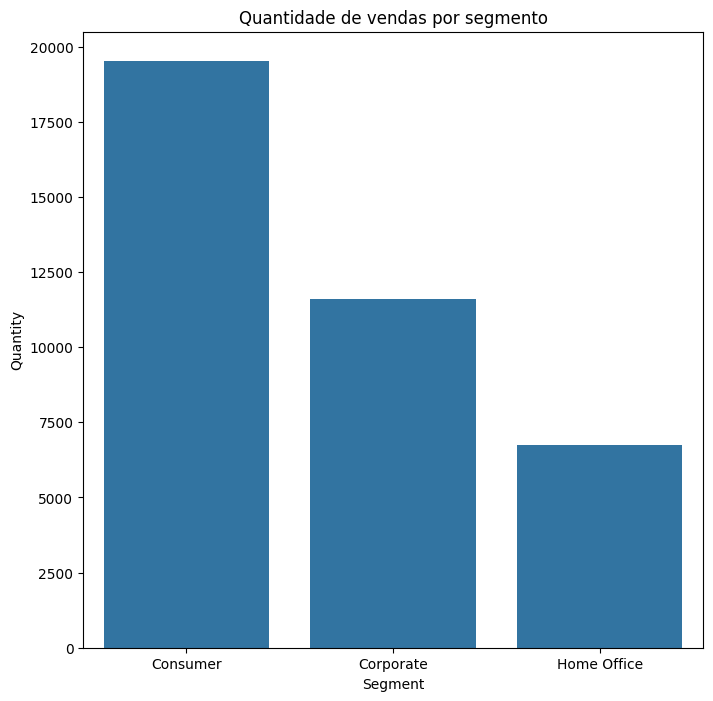

In [206]:
# Quantidade de verdas por segmento
segment_quantity = df.groupby('Segment')['Quantity'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(8,8))
sns.barplot(x ='Segment', y = 'Quantity', data=segment_quantity)
plt.title('Quantidade de vendas por segmento')
plt.savefig('Quantidade_segmento.png')
plt.show()

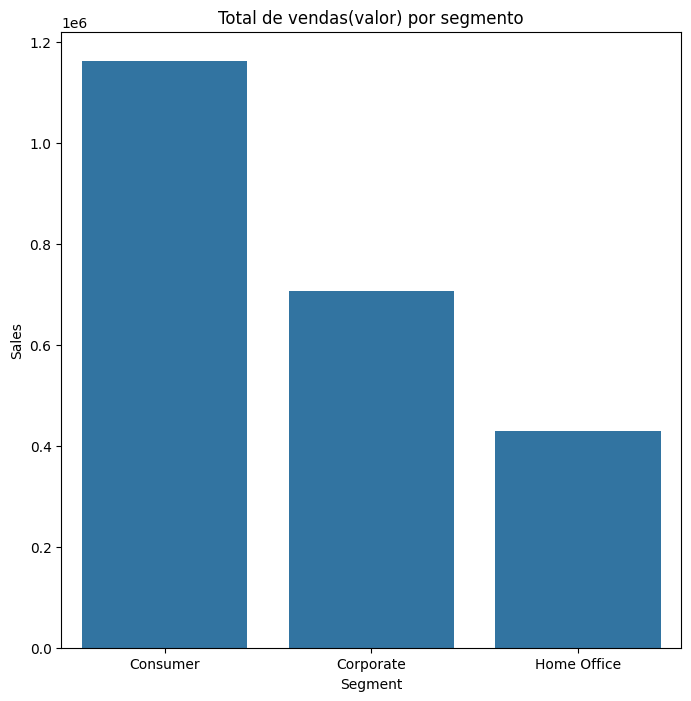

In [207]:
# Total de vendas(valor) por segmento
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(8,8))
sns.barplot(x ='Segment', y = 'Sales', data=segment_sales)
plt.title('Total de vendas(valor) por segmento')
plt.savefig('Vendas_segmento.png')
plt.show()

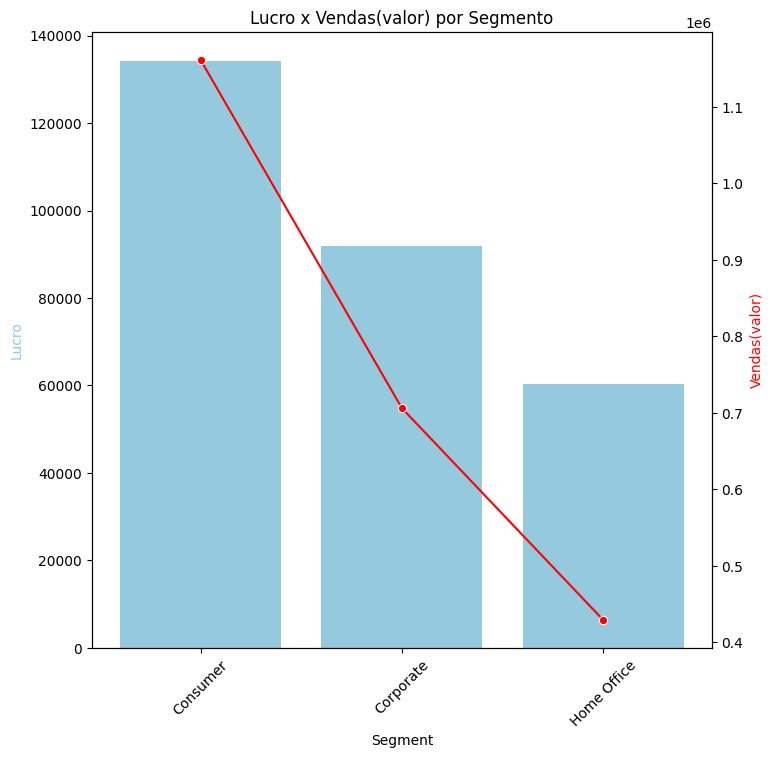

In [208]:
# Gráfico com dois eixos entre Lucro e Valor de vendas da região
fig, ax1 = plt.subplots(figsize=(8,8))

ax2 = ax1.twinx()
sns.barplot(x='Segment', y='Profit', data=segment_profit, color='skyblue', ax=ax1)
sns.lineplot(x='Segment', y='Sales', data=segment_sales, color='red', marker='o', ax=ax2)

ax1.set_ylabel('Lucro', color='skyblue')
ax2.set_ylabel('Vendas(valor)', color='red')
plt.title('Lucro x Vendas(valor) por Segmento')
ax1.tick_params(axis='x', rotation=45)
plt.savefig('LucroVendas_segmento.png')
plt.show()

<ipython-input-209-2b91d82e9c1a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Ticket Médio', data=df_comparativo, palette='coolwarm')


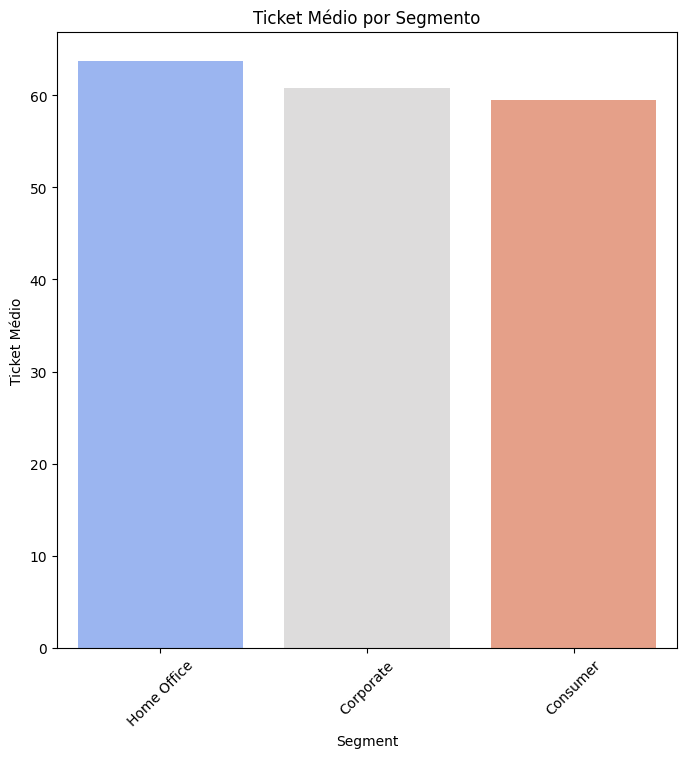

In [209]:
# Junta os dois DataFrames pelo Segmento
df_comparativo = pd.merge(segment_quantity, segment_sales, on='Segment')

# Calcula o ticket médio por segmento
df_comparativo['Ticket Médio'] = df_comparativo['Sales'] / df_comparativo['Quantity']

# Ordenar para melhor visualização
df_comparativo = df_comparativo.sort_values(by='Ticket Médio', ascending=False)

# Gráfico
plt.figure(figsize=(8,8))
sns.barplot(x='Segment', y='Ticket Médio', data=df_comparativo, palette='coolwarm')
plt.title('Ticket Médio por Segmento')
plt.xticks(rotation=45)
plt.savefig('TicketMedio_segmento.png')
plt.show()

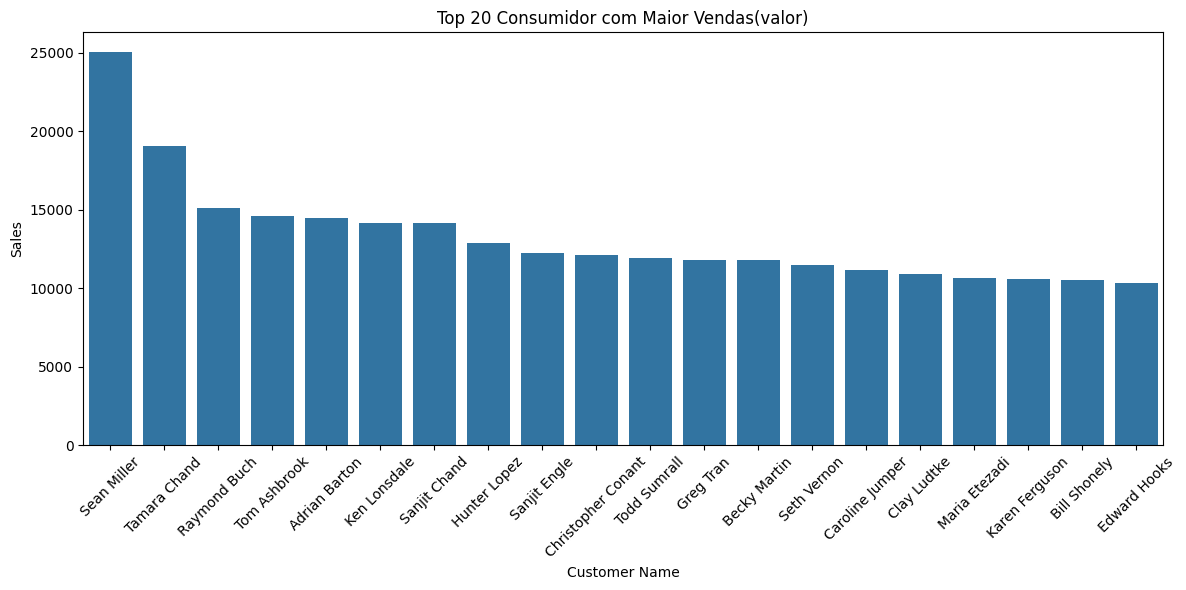

In [210]:
# Total Vendas por consumidor
costumer_sales = df.groupby('Customer Name')['Sales'].sum().reset_index()
# Top 20 consumidores
top_20_customers_sales = costumer_sales.sort_values(by='Sales', ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x='Customer Name', y='Sales', data=top_20_customers_sales)
plt.title('Top 20 Consumidor com Maior Vendas(valor)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Vendas_consumidor.png')
plt.show()

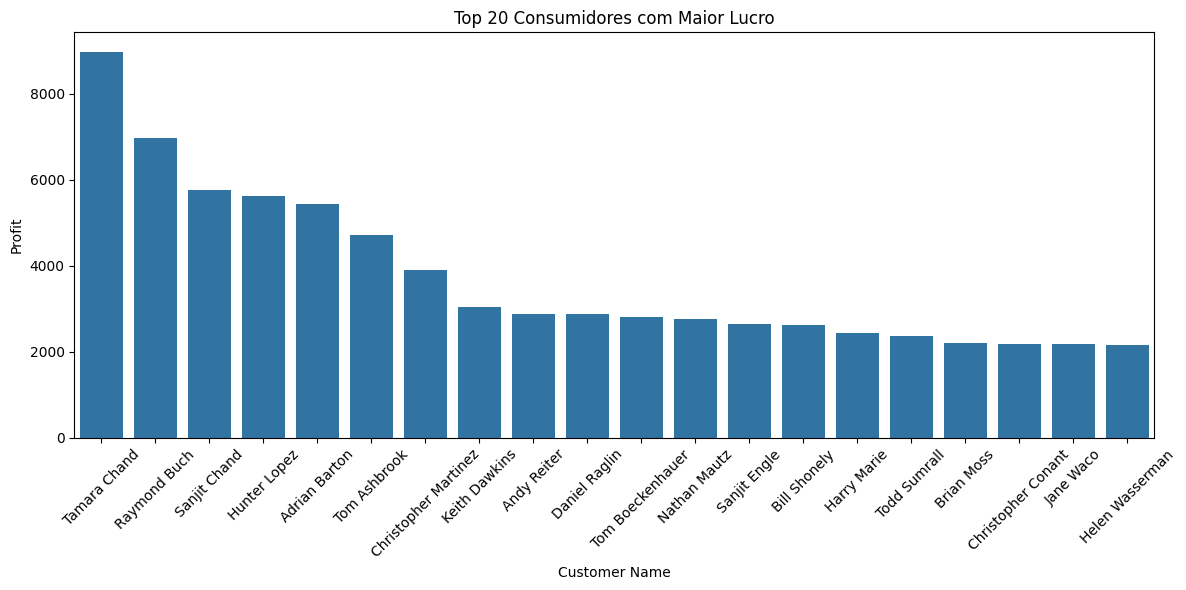

In [211]:
# Lucro por consumidor
costumer_profit = df.groupby('Customer Name')['Profit'].sum().reset_index()
# Top 20 consumidores
top_20_customers_profit = costumer_profit.sort_values(by='Profit', ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x='Customer Name', y='Profit', data=top_20_customers_profit)
plt.title('Top 20 Consumidores com Maior Lucro')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Lucro_consumidor.png')
plt.show()

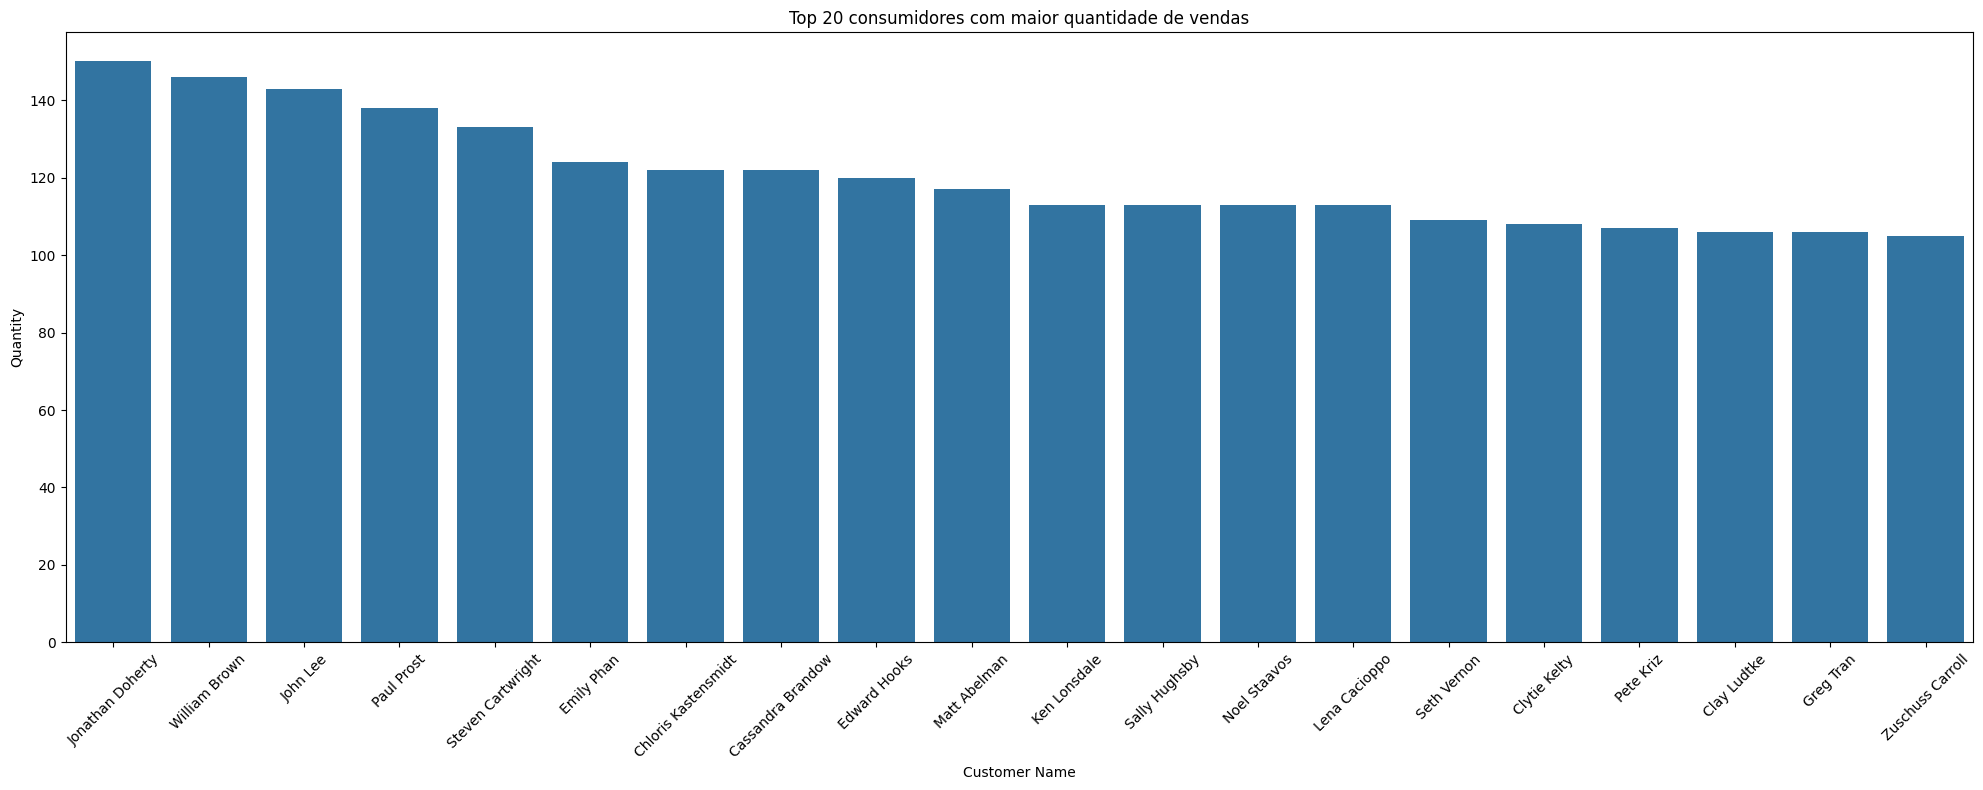

In [212]:
# Quantidade de verdas por segmento
costumer_quantity = df.groupby('Customer Name')['Quantity'].sum().reset_index()
# Top 20 consumidores
top_20_customers_quantity = costumer_quantity.sort_values(by='Quantity', ascending=False).head(20)

# Gráfico de barras
plt.figure(figsize=(20,8))
sns.barplot(x='Customer Name', y = 'Quantity', data=top_20_customers_quantity)
plt.title('Top 20 consumidores com maior quantidade de vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Quantidade_consumidor.png')
plt.show()

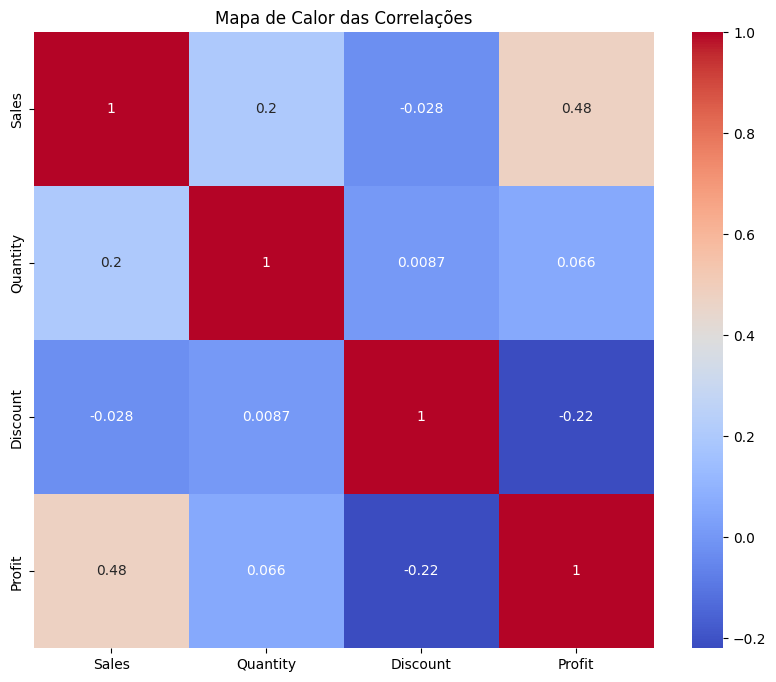

In [213]:
# Seleciona apenas colunas numéricas
numeric_df = df.select_dtypes(include='number')

# Gera o mapa de calor das correlações
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor das Correlações')
plt.savefig('MapaCalor_correlações.png')
plt.show()

In [217]:
files.download('Lucro_consumidor.png')
files.download('Lucro_segmento.png')
files.download('LucroVendas_segmento.png')
files.download('MapaCalor_correlações.png')
files.download('Quantidade_consumidor.png')
files.download('Quantidade_segmento.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('TicketMedio_regiao.png')
files.download('TicketMedio_segmento.png')
files.download('Vendas_consumidor.png')
files.download('Vendas_segmento.png')
files.download('Vendas_subcategoria.png')
files.download('Vendas_regiao.png')

In [ ]:
files.download('TicketMedio_subcategoria.png')
files.download('TicketMedio_categoria.png')
files.download('Quantidade_subcategoria.png')
files.download('Quantidade_regiao.png')
files.download('LucroVendas_subcategoria.png')
files.download('LucroVendas_regiao.png')

In [ ]:
files.download('Lucro_subcategoria.png')
files.download('Lucro_regiao.png')
files.download('LucroVendas_categoria.png')
files.download('Lucro_categoria.png')
files.download('Quantidade_categoria.png')
files.download('Vendas_categoria.png')